In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from statistics import mean 

In [2]:
with open("nba_2013.csv", 'r') as csvfile: 
    nba = pd.read_csv(csvfile)

In [3]:
nba.shape

(481, 31)

In [4]:
# Checking if columns have any null values
nba.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [5]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [6]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [7]:
# As fg column is skewed, will replace the null value with median.
nba['fg.'].fillna(nba['fg.'].mean(), inplace=True)
# As x3p., x2p., efg., ft. column is almost normally distributed, replacing the missing values with mean
nba['x3p.'].fillna(nba['x3p.'].mean(), inplace=True)
nba['x2p.'].fillna(nba['x2p.'].mean(), inplace=True)
nba['efg.'].fillna(nba['efg.'].mean(), inplace=True)
nba['ft.'].fillna(nba['ft.'].mean(), inplace=True)

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nba_numerical = nba.select_dtypes(include=numerics)
nba_numerical.drop(columns=['season_end'], inplace=True)

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
# Checking if columns have any null values
nba.isna().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

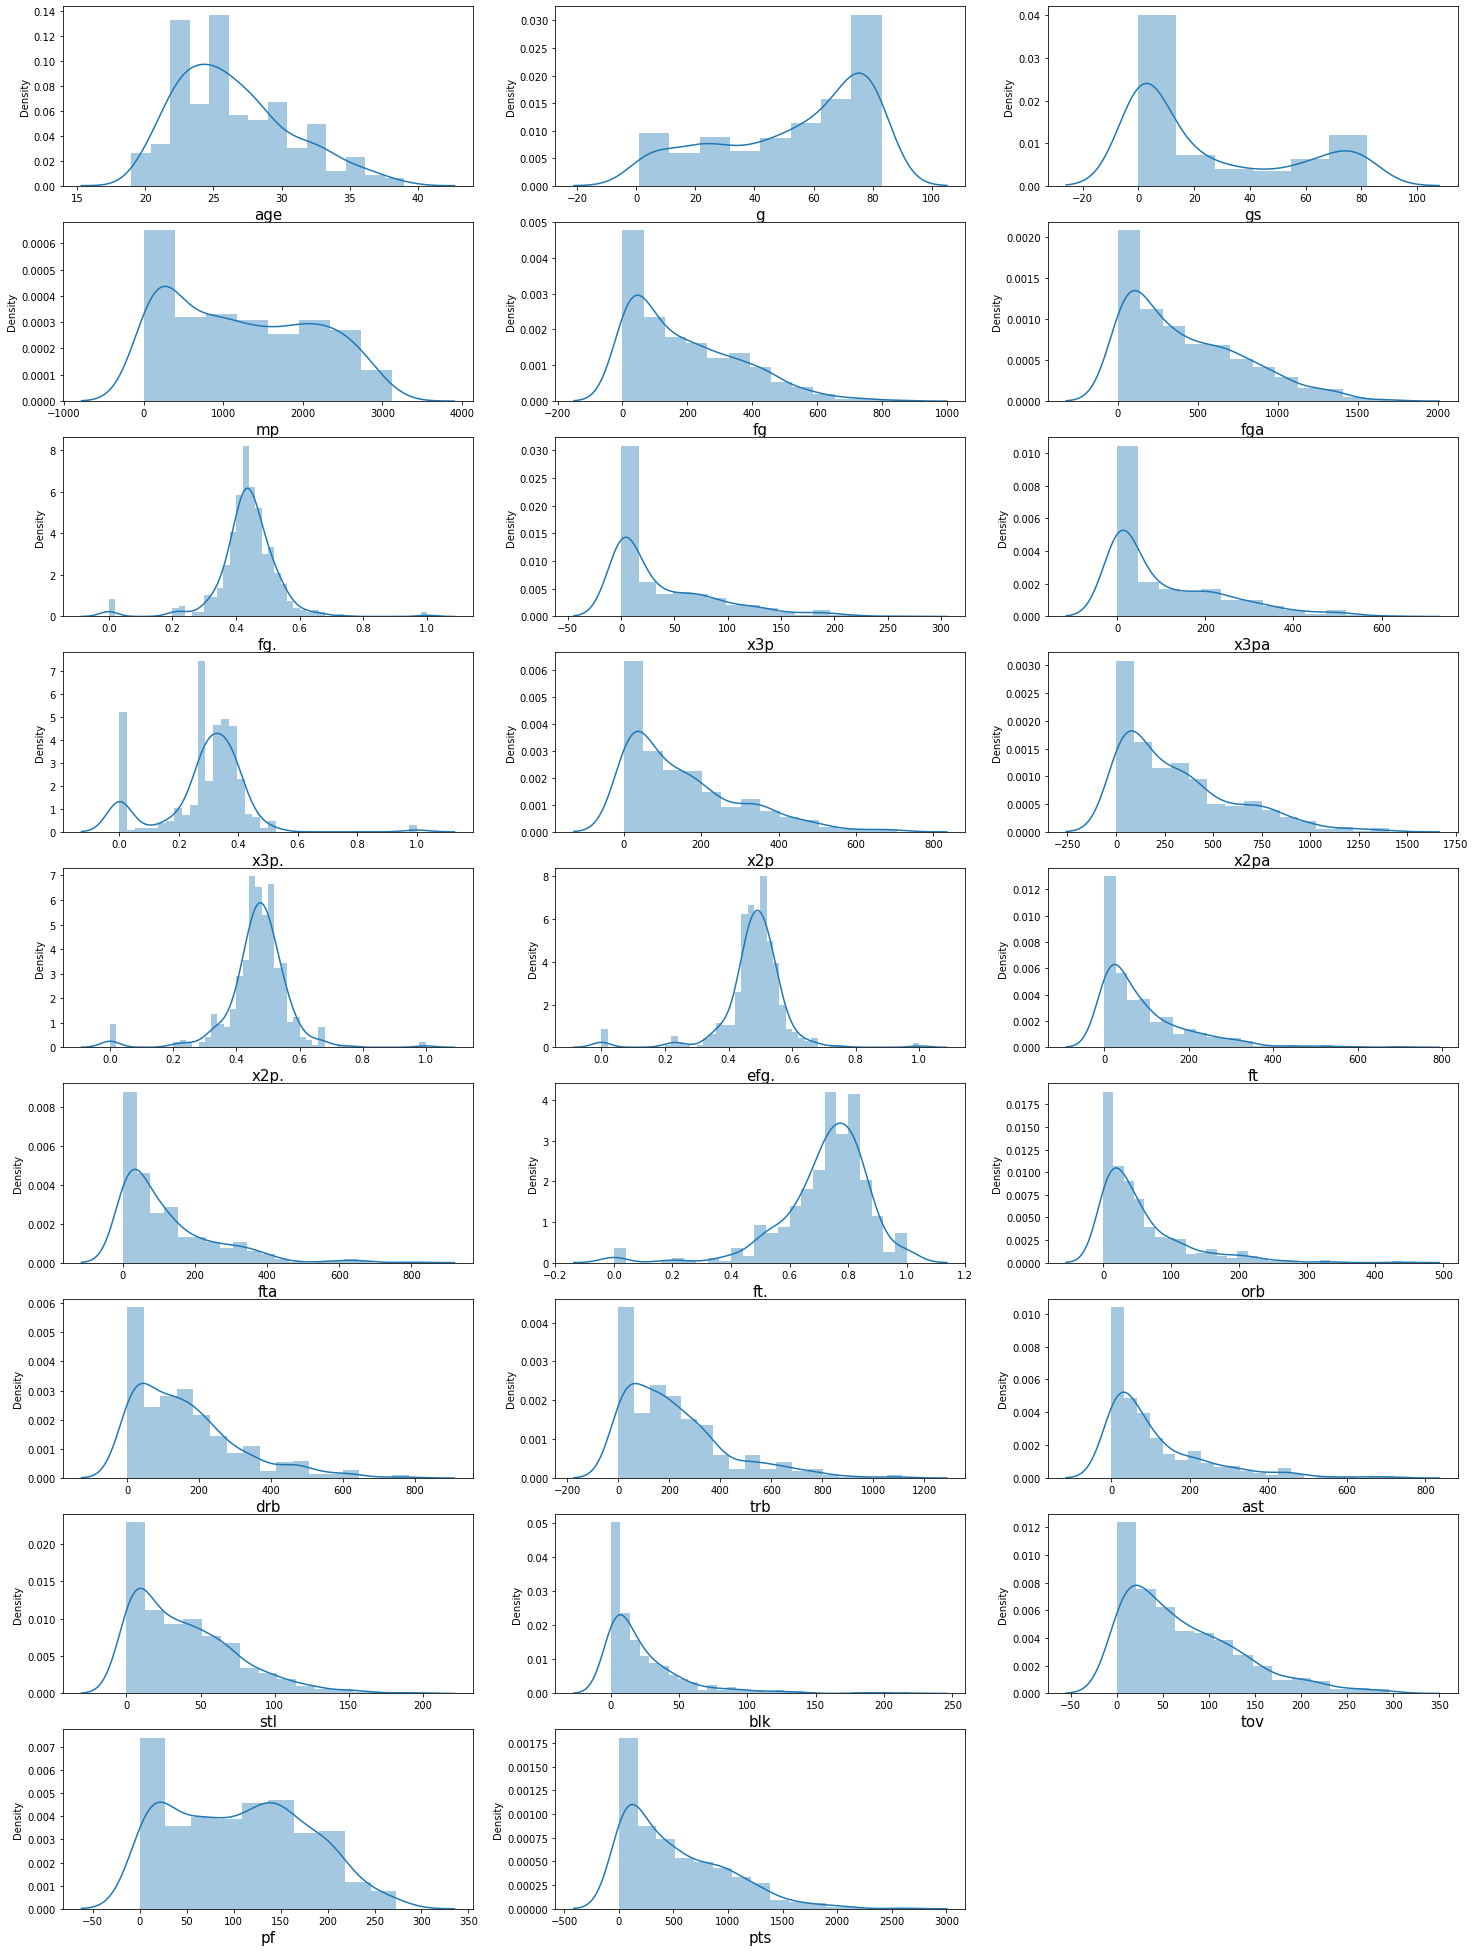

In [10]:
# Checking the distribution of data
plt.figure(figsize=(25,35), facecolor='white')
plotnumber=1
for column in nba_numerical:
    if plotnumber <= 27:
        ax = plt.subplot(9, 3, plotnumber)
        sns.distplot(nba[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()

<AxesSubplot:>

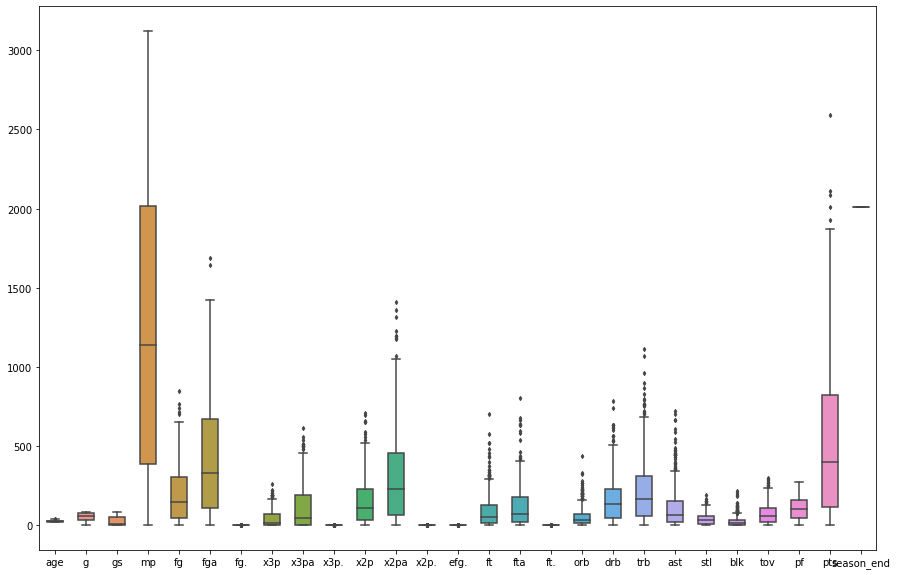

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=nba, width= 0.5,ax=ax,  fliersize=3)

In [12]:
# Normalizing numerical columns
# nba_normalized = nba_numerical.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
nba_normalized = MinMaxScaler().fit_transform(nba_numerical.values)

In [13]:
nba_category = nba[['bref_team_id']]

In [14]:
number = LabelEncoder()
nba_category['bref_team_id'] = number.fit_transform(nba['bref_team_id'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
nba = pd.concat([nba_category, pd.DataFrame(nba_normalized, columns=nba_numerical.columns)], axis=1)

In [16]:
nba.head()

,bref_team_id,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,28,0.20,0.756098,0.000000,0.271067,0.077739,0.083531,0.468,0.015326,0.024390,...,0.660,0.163636,0.183908,0.193896,0.038835,0.120419,0.118721,0.101695,0.446886,0.065947
1,20,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,...,0.581,0.322727,0.242656,0.298025,0.059639,0.209424,0.260274,0.240678,0.743590,0.102198
2,28,0.40,0.634146,0.146341,0.307594,0.168433,0.162915,0.520,0.000000,0.000000,...,0.639,0.231818,0.260536,0.274686,0.052705,0.125654,0.164384,0.132203,0.395604,0.139607
3,21,0.45,0.878049,0.890244,0.817366,0.546525,0.598934,0.459,0.490421,0.487805,...,0.815,0.072727,0.293742,0.235189,0.343967,0.183246,0.013699,0.494915,0.498168,0.512919
4,18,0.30,0.670732,0.365854,0.304390,0.160188,0.147512,0.546,0.000000,0.001626,...,0.836,0.213636,0.233716,0.248654,0.055479,0.120419,0.210046,0.213559,0.684982,0.126494


In [17]:
x_columns = nba.drop(columns=['pts'])
y_column = nba.pts

# x_columns = nba_normalized[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

# # The column that we want to predict.
# y_column = nba_normalized["pts"]
x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size=0.2, random_state = 123)

In [18]:
for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format(r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.7980 for k_value: 1
Regression score is: 0.8117 for k_value: 2
Regression score is: 0.8185 for k_value: 3
Regression score is: 0.8276 for k_value: 4
Regression score is: 0.8130 for k_value: 5
Regression score is: 0.8143 for k_value: 6
Regression score is: 0.8106 for k_value: 7
Regression score is: 0.7993 for k_value: 8
Regression score is: 0.7968 for k_value: 9
Regression score is: 0.7856 for k_value: 10


### K=4, as it gives us the highest prediction score.

In [19]:
param_grid = {'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [18,20,25,27,30,32,34],
              'n_neighbors' : [3,4, 5,7,9,10,11,12,13]
            }

In [20]:
gridsearch = GridSearchCV(knn, param_grid)

In [21]:
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=10, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 4, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 4}

In [23]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =4)

In [24]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [25]:
knn.score(x_train,y_train)

0.8958999666709163

In [26]:
knn.score(x_test,y_test)

0.8275623229821877

#### As our dataset size is small, we will use k fold cross validation for training the model and to check that if model is not overfitted.

In [27]:
#k-fold cross validation 
kfold = KFold(n_splits=12, random_state= 42)
kfold.get_n_splits(x_columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


12

In [28]:
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size = 18, n_neighbors = 4)
cnt =0
count=[]
train_score =[]
test_score = []
x_scaled = x_columns.values
for train_index,test_index in kfold.split(x_scaled):
    X_train, X_test = x_scaled[train_index], x_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y_column.iloc[train_index], y_column.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.9054605273412101 and test score is :   0.7732440965245392
for k =  2
train_score is :   0.900232549337864 and test score is :   0.877892709350229
for k =  3
train_score is :   0.8967781642691686 and test score is :   0.8517014228283427
for k =  4
train_score is :   0.9001117217650348 and test score is :   0.7432514305737026
for k =  5
train_score is :   0.9022604127819778 and test score is :   0.7946695291275356
for k =  6
train_score is :   0.8995538373186219 and test score is :   0.802596894988889
for k =  7
train_score is :   0.9088002050256099 and test score is :   0.7724168297479627
for k =  8
train_score is :   0.8995638521351774 and test score is :   0.880089693756378
for k =  9
train_score is :   0.9012828297786589 and test score is :   0.8384428968344841
for k =  10
train_score is :   0.9063997525923092 and test score is :   0.8326000181703499
for k =  11
train_score is :   0.8984811862538835 and test score is :   0.8762758055421346
for k =  12


([<matplotlib.axis.YTick at 0x19d243e7888>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

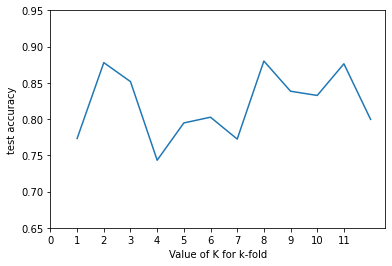

In [29]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 

Our cross validation tells that on an avergae our model has a 82% accuracy on our test data. so, that's how we can use cross validation to compute how well our model is generalizing on our data.

Project Done By: Urvi Gadda

mailto: urvigada96@gmail.com